## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [8]:
import os
import keras
from keras.regularizers import l1, l2, l1_l2

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [9]:
train, test = keras.datasets.cifar10.load_data()

In [10]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [11]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [12]:
#建立神經網路，並加入 L2
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l2_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l2(l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l2(l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [16]:
#建立神經網路，並加入 L1
def build_mlp_2(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1(l1_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1(l1_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [17]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L2_EXP = [1e-2, 1e-4, 1e-8, 1e-12]
L1_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [14]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regulizer_ratio in L2_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l2_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Regulizer = 0.010000
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Instructions for updati

50000/50000 [==============================] - 3s 62us/step - loss: 1.6187 - acc: 0.5214 - val_loss: 1.7550 - val_acc: 0.4752
Epoch 49/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.6164 - acc: 0.5224 - val_loss: 1.6924 - val_acc: 0.4912
Epoch 50/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.6135 - acc: 0.5234 - val_loss: 1.7092 - val_acc: 0.4862
Experiment with Regulizer = 0.000100
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (Non

50000/50000 [==============================] - 3s 62us/step - loss: 1.0234 - acc: 0.6903 - val_loss: 1.5059 - val_acc: 0.5349
Epoch 50/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.0135 - acc: 0.6955 - val_loss: 1.5712 - val_acc: 0.5187
Experiment with Regulizer = 0.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)

50000/50000 [==============================] - 3s 63us/step - loss: 0.8789 - acc: 0.6932 - val_loss: 1.3850 - val_acc: 0.5317
Experiment with Regulizer = 0.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
___________________________________

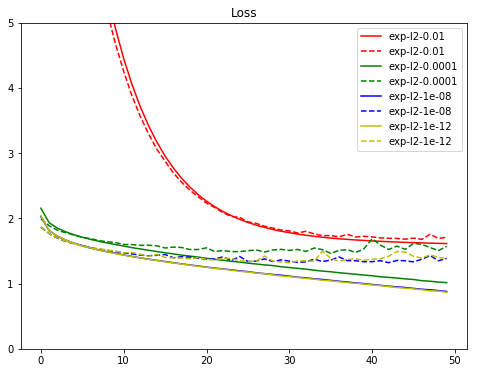

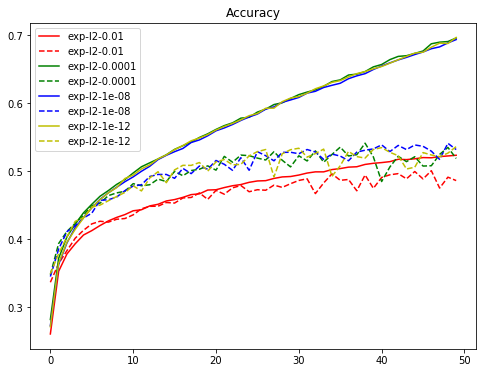

In [15]:
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [18]:
results_2 = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regulizer_ratio in L1_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp_2(input_shape=x_train.shape[1:], l1_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l1-%s" % str(regulizer_ratio)
    results_2[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Regulizer = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 73us/step - loss: 5.9758 - acc: 0.2842 - val_loss: 5.7839 - val_acc: 0.3552
Epoch 2/50
50000/50000 [==============================] - 3s 63us/step - loss: 5.7003 - acc: 0.3728 - val_loss: 5.6178 - val_acc: 0.3873
Epoch 3/50
50000/50000 [==============================] - 3s 63us/step - loss: 5.5564 - acc: 0.4028 - val_loss: 5.4961 - val_acc: 0.4145
Epoch 4/50
50000/50000 [==============================] - 3s 63us/step - loss: 5.4388 - acc: 0.4205 - val_loss: 5.3858 - val_acc: 0.4272
Epoch 5/50
50000/50000 [==============================] - 3s 63us/step - loss: 5.3304 - acc: 0.4376 - val_loss: 5.2831 - val_acc: 0.4380
Epoch 6/50
50000/50000 [==============================] - 3s 64us/step - loss: 5.2313 - acc: 0.4491 - val_loss: 5.1983 - val_acc: 0.4498
Epoch 7/50
50000/50000 [==============================] - 3s 63us/step - loss: 5.1375 - acc: 0.4602 - val_loss: 5.1160 - val_acc

50000/50000 [==============================] - 3s 67us/step - loss: 1.8084 - acc: 0.3616 - val_loss: 1.7542 - val_acc: 0.3876
Epoch 3/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.7230 - acc: 0.3956 - val_loss: 1.6906 - val_acc: 0.4085
Epoch 4/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.6632 - acc: 0.4193 - val_loss: 1.6413 - val_acc: 0.4233
Epoch 5/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.6144 - acc: 0.4342 - val_loss: 1.5969 - val_acc: 0.4392
Epoch 6/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.5737 - acc: 0.4503 - val_loss: 1.5683 - val_acc: 0.4482
Epoch 7/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.5387 - acc: 0.4596 - val_loss: 1.5535 - val_acc: 0.4533
Epoch 8/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.5089 - acc: 0.4719 - val_loss: 1.5448 - val_acc: 0.4521
Epoch 9/50
50000/50000 [============================

50000/50000 [==============================] - 4s 73us/step - loss: 1.7201 - acc: 0.3998 - val_loss: 1.6924 - val_acc: 0.4064
Epoch 4/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.6630 - acc: 0.4197 - val_loss: 1.6403 - val_acc: 0.4251
Epoch 5/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.6146 - acc: 0.4350 - val_loss: 1.6121 - val_acc: 0.4363
Epoch 6/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.5750 - acc: 0.4486 - val_loss: 1.5789 - val_acc: 0.4499
Epoch 7/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.5390 - acc: 0.4619 - val_loss: 1.5490 - val_acc: 0.4541
Epoch 8/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.5074 - acc: 0.4730 - val_loss: 1.5290 - val_acc: 0.4612
Epoch 9/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.4805 - acc: 0.4823 - val_loss: 1.5068 - val_acc: 0.4667
Epoch 10/50
50000/50000 [===========================

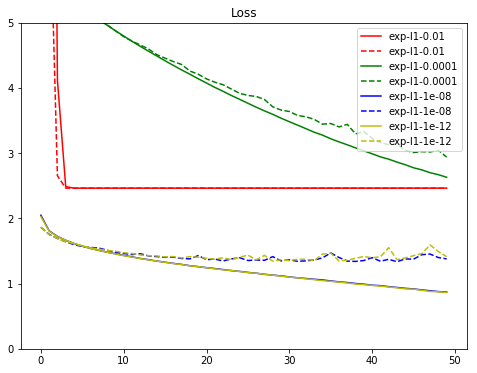

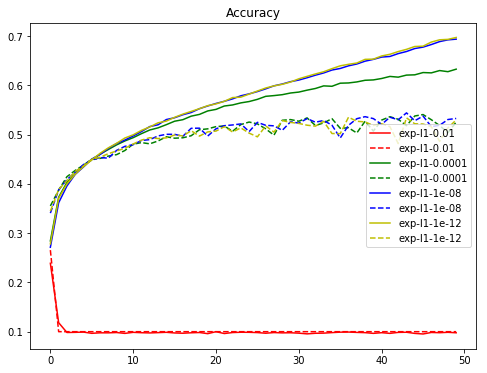

In [21]:
#draw result
plt.figure(figsize=(8,6))
for i, cond in enumerate(results_2.keys()):
    plt.plot(range(len(results_2[cond]['train-loss'])),results_2[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_2[cond]['valid-loss'])),results_2[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results_2.keys()):
    plt.plot(range(len(results_2[cond]['train-acc'])),results_2[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_2[cond]['valid-acc'])),results_2[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()